In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os

submissions = pd.read_csv('./submissions.csv')
theia_sessions = pd.read_csv('./theia_sessions.csv')

In [2]:
submissions['created'] = submissions['created'].apply(pd.to_datetime)
theia_sessions['created'] = theia_sessions['created'].apply(pd.to_datetime)
theia_sessions = theia_sessions[theia_sessions['created'] > datetime(2020, 12, 19)]

assignment_id
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
5    AxesSubplot(0.125,0.2;0.775x0.68)
6    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

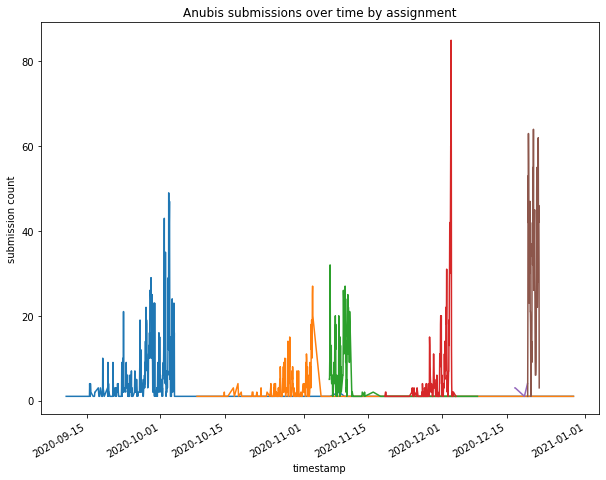

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
submissions.groupby(['assignment_id', 'created'])['id'].count().reset_index().rename(columns={'id':'count'}).groupby('assignment_id')\
  .plot(x='created', xlabel='timestamp', y='count', ylabel='submission count', legend=False, title='Anubis submissions over time by assignment', ax=ax)

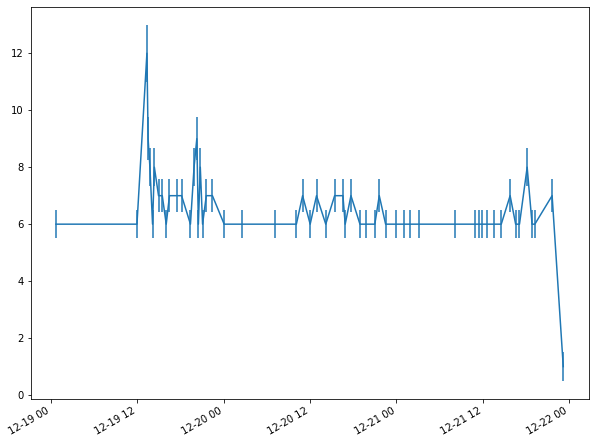

In [7]:
fig, ax = plt.subplots(figsize=(10, 8), )

sessions = theia_sessions.groupby(['created']).count().reset_index().rename(columns={'id':'count'})
agged = []
for index in range(0, len(sessions['count']), 6):
    agged.append([
        sessions.iloc[index]['created'], # timestamp
        sessions.iloc[index:index+6]['count'].sum(), # count
        sessions.iloc[index:index+6]['duration'].mean(), # duration
    ])
agged = pd.DataFrame(columns=['timestamp', 'count', 'duration'], data=agged)
agged.to_csv('condensed_theia_sessions.csv')

ax.errorbar(agged['timestamp'], agged['count'], agged['duration'] / agged['duration'].max())
fig.autofmt_xdate()

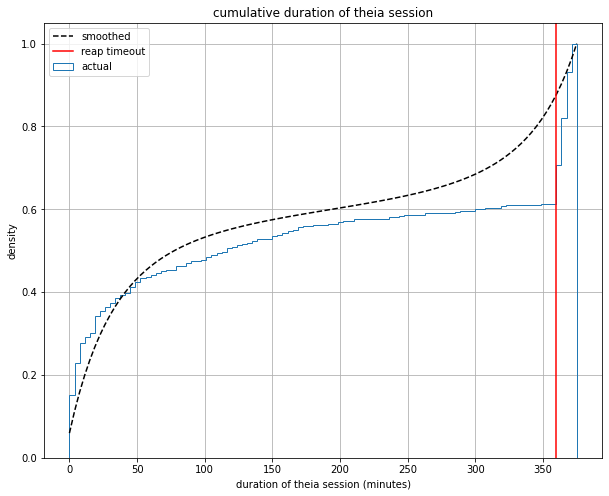

In [6]:
mu = 195
sigma = 75
n_bins = 100

fig, ax = plt.subplots(figsize=(10, 8))

n, bins, patches = ax.hist(theia_sessions['duration'], n_bins, density=True, histtype='step', cumulative=True, label='actual')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='smoothed')

ax.axvline(x=360, color='red', label='reap timeout')

ax.grid()
ax.legend(loc='upper left')
ax.set(title='cumulative duration of theia session', xlabel='duration of theia session (minutes)', ylabel='density')
plt.show()

In [12]:
for i in agged['duration']:
    print(i)

1.0
1.0
2.0
1.5
1.3333333333333333
1.0
1.3333333333333333
1.1666666666666667
1.1666666666666667
1.0
1.1666666666666667
1.1666666666666667
1.1666666666666667
1.0
1.3333333333333333
1.5
1.0
1.3333333333333333
1.0
1.1666666666666667
1.1666666666666667
1.0
1.0
1.0
1.0
1.1666666666666667
1.0
1.1666666666666667
1.0
1.1666666666666667
1.1666666666666667
1.0
1.1666666666666667
1.0
1.0
1.0
1.1666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.1666666666666667
1.0
1.0
1.3333333333333333
1.0
1.0
1.1666666666666667
1.0
